## Hand-Written Digit Reader
## Richard Cooke
## G00331787

### Approach of this notebook was based on this work: https://www.ics.uci.edu/~mohamadt/keras_mnist.html#Load-data-set.

## Making The Necessary Imports

In [1]:
# Used to 
import numpy as np
import matplotlib.pyplot as plt

# Used to create the Neural network
import keras as kr
import gzip

Using TensorFlow backend.


## Loading and Decompressing the dataset

In [2]:
# Importing the the mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
# Original data is [0-255]. Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)
train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 0 of training labels ", train_lbl[5])

One hot vector at index 0 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images from the datasets

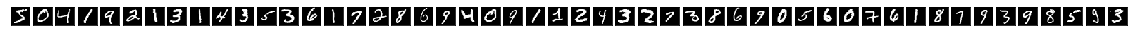

In [3]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(20,10))

# For loop that will iterate 10 times, once for each digit in the set
for i in range(50):
    plt.subplot(1,50,i+1)
    
    #shows the relevant image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Removing label markings from both the x and y axis'
    plt.xticks([])
    plt.yticks([])

## Creating the Neural Network

In [4]:
# Creating the neural netwrok by using the models import from keras
model = kr.models.Sequential()

# Creating the layers of the netwrok using the Dense call from the layers import
model.add(kr.layers.Dense(256, activation='relu', input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(kr.layers.Dense(256, activation='relu'))
model.add(kr.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the Model

In [7]:
history = model.fit(train_img, train_lbl, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2594 - accuracy: 0.9242
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0957 - accuracy: 0.9715
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0654 - accuracy: 0.9801
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0465 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0335 - accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0272 - accuracy: 0.9913
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0225 - accuracy: 0.9925
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0172 - accuracy: 0.9943
Epoch 9/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0130 - accuracy: 0.9956
Epoch 10/10
60000/60000 [==============================

## Evaluating Efficiency

In [8]:
# Calculates and displays the loss and accuracy of the model
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.012218594
Test accuracy: 0.996100008


## Saving The Model

In [9]:
model.save('digit_reader.h5')

## Other References

* https://keras.io/
* https://www.tensorflow.org/guide/keras/overview
* https://www.python.org/
* https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D135
* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
 